## Homegate Analysis

In [25]:
# Preliminary
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sys


os.chdir('/Users/drutna/Documents/pp4rs/assignment/pp4r_final_assignments') # change this to your path

In [2]:
# Read file
df = pd.read_csv('data/Homegate_data_cleaned.csv')
df.head()

,Net Rent (CHF),Additional Expenses (CHF),Gross Rent (CHF),Available Date,Property Type,Number of Rooms,Number of Toilets,Floor Level,Living Area (sq. m.),Year Built,...,Room Height (m.),Last Refurbishment Year,Number of Floors,Floor Space (sq. m.),Land Area (sq. m.),Number of Apartments,Property Volume (cubic m.),Street,Postcode,City
0,3015.0,380.0,3395.0,01.11.2023,Apartment,3.5,1.0,6.0,88.0,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pfingstweidstrasse 106b,8005.0,Zürich
1,3050.0,400.0,3450.0,01.12.2023,Apartment,2.5,NaN,1.0,80.0,2017.0,...,2.5,NaN,NaN,NaN,NaN,NaN,NaN,Gläserenstrasse 14,8142.0,Uitikon Waldegg
2,2445.0,323.0,2768.0,Immediately,Apartment,4.5,NaN,4.0,100.0,NaN,...,NaN,2023.0,NaN,NaN,NaN,NaN,NaN,Sihlfeldstrasse 89,8004.0,Zürich
3,3235.0,260.0,3495.0,01.11.2023,Apartment,4.0,NaN,2.0,95.0,1921.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kreuzstrasse 6,8802.0,Kilchberg
4,NaN,NaN,NaN,01.10.2023,Apartment,4.5,NaN,24.0,127.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hagenholzstrasse,8050.0,Zürich


### Plots

In the analysis below, I drop the listings with gross rent > 20000 (n = 2), since they seem to be outliers...

In [3]:
# print out the rows with gross rent > 20000
df[df['Gross Rent (CHF)'] > 20000]

,Net Rent (CHF),Additional Expenses (CHF),Gross Rent (CHF),Available Date,Property Type,Number of Rooms,Number of Toilets,Floor Level,Living Area (sq. m.),Year Built,...,Room Height (m.),Last Refurbishment Year,Number of Floors,Floor Space (sq. m.),Land Area (sq. m.),Number of Apartments,Property Volume (cubic m.),Street,Postcode,City
354,NaN,NaN,26565.0,By agreement,Duplex,6.5,NaN,5.0,515.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dianastrasse 5,8002.0,Zürich
368,NaN,NaN,50000.0,Immediately,Apartment,3.5,NaN,NaN,78.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# drop if Gross Rent > 20000
df = df[df['Gross Rent (CHF)'] < 20000]

In [5]:
# create a column for gross rent per square meter
df['Gross Rent Per Sqm (CHF/m2)'] = df['Gross Rent (CHF)'] / df['Living Area (sq. m.)']

Histogram of Gross Rent and Gross Rent per Sqm

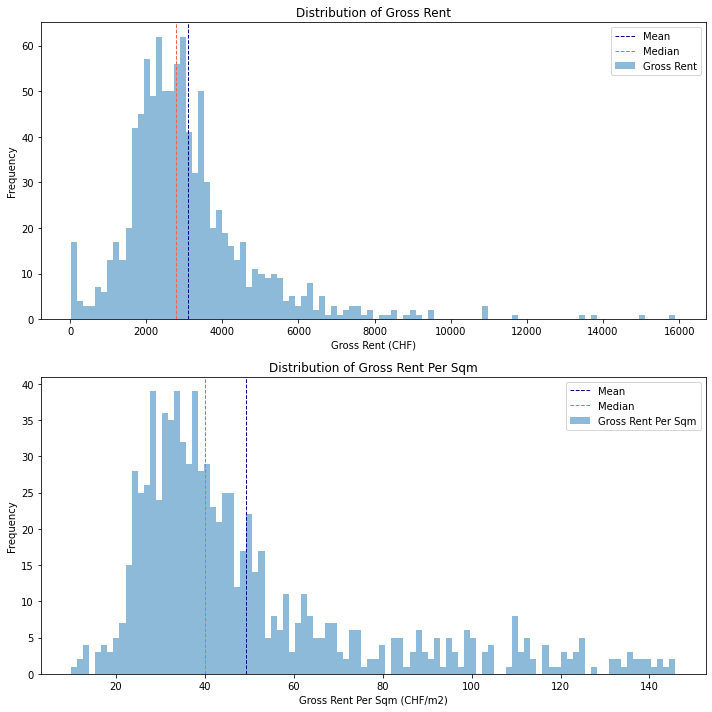

In [6]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the distribution of Gross Rent
ax1.hist(df['Gross Rent (CHF)'], bins=100, alpha=0.5, label='Gross Rent')
ax1.set_xlabel('Gross Rent (CHF)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Gross Rent')
ax1.axvline(df['Gross Rent (CHF)'].mean(), color='#00008B', linestyle='dashed', linewidth=1, label='Mean')
ax1.axvline(df['Gross Rent (CHF)'].median(), color='#FF6347', linestyle='dashed', linewidth=1, label='Median')

# Plot the distribution of Gross rent per sqm in the second subplot
ax2.hist(df['Gross Rent Per Sqm (CHF/m2)'], bins=100, alpha=0.5, label='Gross Rent Per Sqm')
ax2.set_xlabel('Gross Rent Per Sqm (CHF/m2)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Gross Rent Per Sqm')
ax2.axvline(df['Gross Rent Per Sqm (CHF/m2)'].mean(), color='#00008B', linestyle='dashed', linewidth=1, label='Mean')
ax2.axvline(df['Gross Rent Per Sqm (CHF/m2)'].median(), color='#FF6347', linestyle='dashed', linewidth=1, label='Median')

# Add a legend
ax1.legend()
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()
fig.savefig('output/figures/histogram_gross_rent.png', bbox_inches='tight')


Mean Gross Rent by City

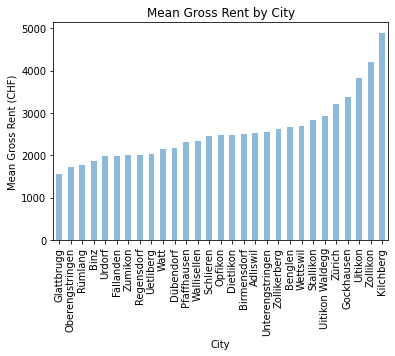

In [7]:
# plot the mean gross rent by city, in ascending order
df.groupby('City')['Gross Rent (CHF)'].mean().sort_values().plot(kind='bar', alpha=0.5)
plt.xlabel('City')
plt.ylabel('Mean Gross Rent (CHF)')
plt.title('Mean Gross Rent by City')
plt.savefig('output/figures/histogram_gross_rent_by_city.png', bbox_inches = "tight")
plt.show()

Distribution of House Characteristics

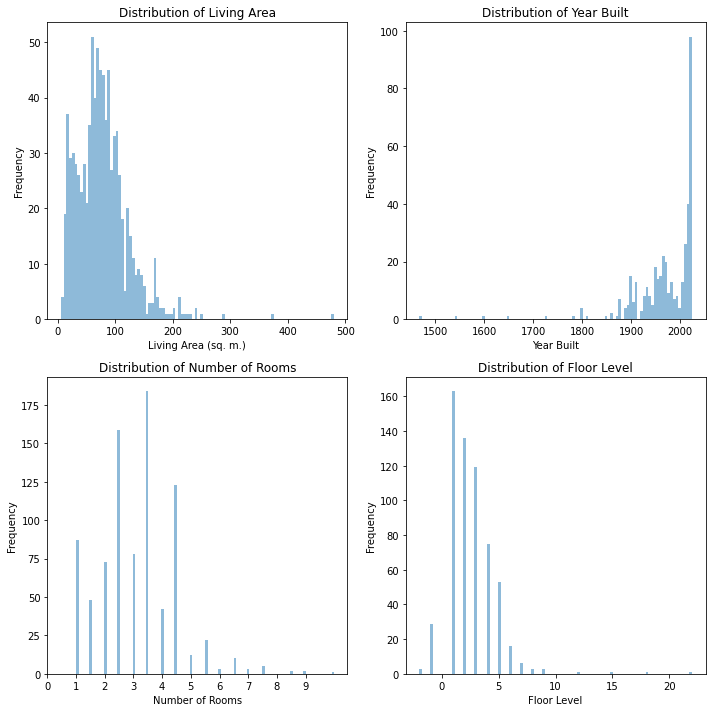

In [8]:
# create a histogram of living area, Year Built, Number of Rooms, floor level in one big graph, with 2 rows and 2 columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

# Plot the distribution of Living Area
ax1.hist(df['Living Area (sq. m.)'], bins=100, alpha=0.5, label='Living Area')
ax1.set_xlabel('Living Area (sq. m.)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Living Area')

# Plot the distribution of Year Built
ax2.hist(df['Year Built'], bins=100, alpha=0.5, label='Year Built')
ax2.set_xlabel('Year Built')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Year Built')

# Plot the distribution of Number of Rooms, with label step size 0.5
ax3.hist(df['Number of Rooms'], bins=100, alpha=0.5, label='Number of Rooms')
ax3.set_xlabel('Number of Rooms')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Number of Rooms')
ax3.xaxis.set_ticks(np.arange(0, 10, 1))

# Plot the distribution of Floor Level
ax4.hist(df['Floor Level'], bins=100, alpha=0.5, label='Floor Level')
ax4.set_xlabel('Floor Level')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Floor Level')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

# Save the combined plot
fig.savefig('output/figures/histogram_4_characteristics.png', bbox_inches='tight')


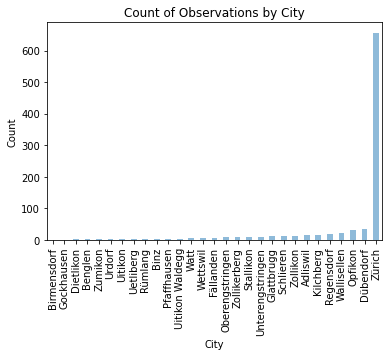

In [9]:
# plot the count of observations by city, in ascending order
df.groupby('City')['Gross Rent (CHF)'].count().sort_values().plot(kind='bar', alpha=0.5)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of Observations by City')
plt.savefig('output/figures/histogram_obs_by_city.png', bbox_inches='tight')
plt.show()

Correlation Between Gross Rent and Living Area

In [10]:
# print the number of observations by city
df.groupby('City')['Gross Rent (CHF)'].count().sort_values()

City
Birmensdorf           1
Gockhausen            1
Dietlikon             2
Benglen               2
Zumikon               2
Urdorf                2
Uitikon               2
Uetliberg             2
Rümlang               3
Binz                  3
Pfaffhausen           4
Uitikon Waldegg       4
Watt                  5
Wettswil              5
Fällanden             6
Oberengstringen       8
Zollikerberg          8
Stallikon             8
Unterengstringen     10
Glattbrugg           11
Schlieren            12
Zollikon             14
Adliswil             15
Kilchberg            16
Regensdorf           20
Wallisellen          22
Opfikon              32
Dübendorf            34
Zürich              656
Name: Gross Rent (CHF), dtype: int64

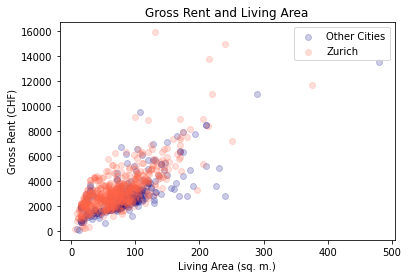

In [11]:
# create a scatter plot of Gross Rent and Living Area, make the observations in Zurich red, while others blue
plt.scatter(df[df['City'] != 'Zürich']['Living Area (sq. m.)'], df[df['City'] != 'Zürich']['Gross Rent (CHF)'], alpha=0.2, color='#00008B')
plt.scatter(df[df['City'] == 'Zürich']['Living Area (sq. m.)'], df[df['City'] == 'Zürich']['Gross Rent (CHF)'], alpha=0.2, color='#FF6347')

# add legend and labels
plt.legend(['Other Cities', 'Zurich'])

plt.xlabel('Living Area (sq. m.)')
plt.ylabel('Gross Rent (CHF)')
plt.title('Gross Rent and Living Area')

# Save scatter plot
plt.savefig('output/figures/scatter_rent_living_area.png', bbox_inches='tight')
plt.show()

The Changes of House Characteristics over Time 

In [91]:
# Create a figure with 3 subplots, with 3 rows and 1 column. For the first figure, calculate the mean mean gross by year built, and plot the average living area for each year, using a dot. For the second figure, calculate the mean living area by year built, and plot the average gross rent for each year, using a dot. For the third figure, calculate the mean number of rooms rent per sqm by year built, and plot the average gross rent per sqm for each year, using a dot.

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# # Plot the mean gross rent by year built
# ax1.scatter(df.groupby('Year Built')['Gross Rent (CHF)'].mean().index, df.groupby('Year Built')['Gross Rent (CHF)'].mean(), color='#00008B', alpha=0.5)
# ax1.set_xlabel('Year Built')
# ax1.set_ylabel('Mean Gross Rent (CHF)')
# ax1.set_title('Mean Gross Rent by Year Built')

# # Plot the mean living area by year built
# ax2.scatter(df.groupby('Year Built')['Living Area (sq. m.)'].mean().index, df.groupby('Year Built')['Living Area (sq. m.)'].mean(), color='#FF6347', alpha=0.5)
# ax2.set_xlabel('Year Built')
# ax2.set_ylabel('Mean Living Area (sq. m.)')
# ax2.set_title('Mean Living Area by Year Built')

# # Plot the mean gross rent per sqm by year built
# ax3.scatter(df.groupby('Year Built')['Number of Rooms'].mean().index, df.groupby('Year Built')['Number of Rooms'].mean(), color='#008000', alpha=0.5)
# ax3.set_xlabel('Year Built')
# ax3.set_ylabel('Number of Rooms')
# ax3.set_title('Number of Rooms by Year Built')

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the combined plot
# plt.show()


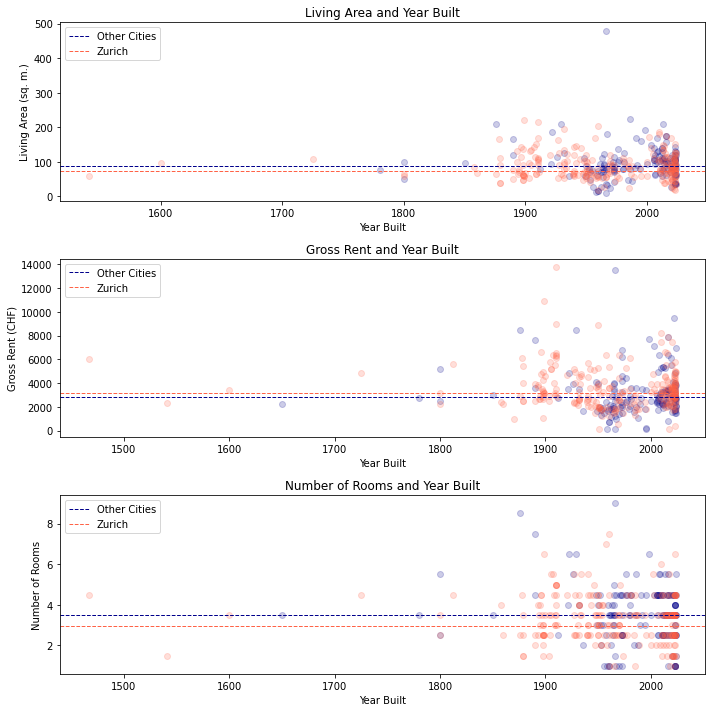

In [12]:
# create a scatter plot of Year built and Living area, Year Built and Gross Rent, Year Built and Number of Rooms, Year Built as x-axis, and other variables as y-axis, make the observations in Zurich red, while others blue. The three plots in 3 subplots, with 3 rows and 1 column. Add the mean value of each year. 
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot the distribution of Living Area
ax1.scatter(df[df['City'] != 'Zürich']['Year Built'], df[df['City'] != 'Zürich']['Living Area (sq. m.)'], alpha=0.2, color='#00008B')
ax1.scatter(df[df['City'] == 'Zürich']['Year Built'], df[df['City'] == 'Zürich']['Living Area (sq. m.)'], alpha=0.2, color='#FF6347')
ax1.set_xlabel('Year Built')
ax1.set_ylabel('Living Area (sq. m.)')
ax1.set_title('Living Area and Year Built')
ax1.axhline(df[df['City'] != 'Zürich']['Living Area (sq. m.)'].mean(), color='#00008B', linestyle='dashed', linewidth=1, label='Mean')
ax1.axhline(df[df['City'] == 'Zürich']['Living Area (sq. m.)'].mean(), color='#FF6347', linestyle='dashed', linewidth=1, label='Mean')
ax1.legend(['Other Cities', 'Zurich'])

# Plot the distribution of Gross Rent
ax2.scatter(df[df['City'] != 'Zürich']['Year Built'], df[df['City'] != 'Zürich']['Gross Rent (CHF)'], alpha=0.2, color='#00008B')
ax2.scatter(df[df['City'] == 'Zürich']['Year Built'], df[df['City'] == 'Zürich']['Gross Rent (CHF)'], alpha=0.2, color='#FF6347')
ax2.set_xlabel('Year Built')
ax2.set_ylabel('Gross Rent (CHF)')
ax2.set_title('Gross Rent and Year Built')
ax2.axhline(df[df['City'] != 'Zürich']['Gross Rent (CHF)'].mean(), color='#00008B', linestyle='dashed', linewidth=1, label='Mean')
ax2.axhline(df[df['City'] == 'Zürich']['Gross Rent (CHF)'].mean(), color='#FF6347', linestyle='dashed', linewidth=1, label='Mean')
ax2.legend(['Other Cities', 'Zurich'])


# Plot the distribution of Number of Rooms

ax3.scatter(df[df['City'] != 'Zürich']['Year Built'], df[df['City'] != 'Zürich']['Number of Rooms'], alpha=0.2, color='#00008B')
ax3.scatter(df[df['City'] == 'Zürich']['Year Built'], df[df['City'] == 'Zürich']['Number of Rooms'], alpha=0.2, color='#FF6347')
ax3.set_xlabel('Year Built')
ax3.set_ylabel('Number of Rooms')
ax3.set_title('Number of Rooms and Year Built')
ax3.axhline(df[df['City'] != 'Zürich']['Number of Rooms'].mean(), color='#00008B', linestyle='dashed', linewidth=1, label='Mean')
ax3.axhline(df[df['City'] == 'Zürich']['Number of Rooms'].mean(), color='#FF6347', linestyle='dashed', linewidth=1, label='Mean')
ax3.legend(['Other Cities', 'Zurich'])

# control the layout of the subplots
plt.tight_layout()

fig.savefig('output/figures/scatter_characteristics_year.png', bbox_inches='tight')



Correlation matrix

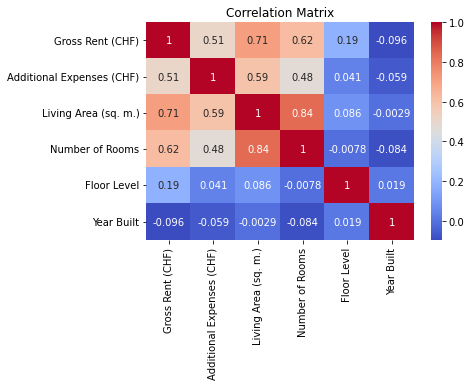

In [13]:
# create a correlation matrix of gross rent, additional expenses, living area, number of rooms, floor level, year built
df[['Gross Rent (CHF)', 'Additional Expenses (CHF)', 'Living Area (sq. m.)', 'Number of Rooms', 'Floor Level', 'Year Built']].corr()

# plot the correlation matrix as a heatmap
import seaborn as sns
sns.heatmap(df[['Gross Rent (CHF)', 'Additional Expenses (CHF)', 'Living Area (sq. m.)', 'Number of Rooms', 'Floor Level', 'Year Built']].corr(), annot=True, cmap='coolwarm')
title = plt.title('Correlation Matrix')

# Save heatmap
plt.savefig('output/figures/heat_map.png', bbox_inches='tight')
plt.show()

### Regressions 

What decides Gross Rents?

In [14]:
# add city dummies, which should be a 0/1 variable for each city, with Zurich as the base city
df = pd.get_dummies(df, columns=['City'], drop_first=True, dummy_na=True)
# Select columns starting with "City_"
city_columns = df.columns[df.columns.str.startswith('City_')]

# Convert the selected columns to 1 and 0
df[city_columns] = df[city_columns].astype(int)

df.head()


,Net Rent (CHF),Additional Expenses (CHF),Gross Rent (CHF),Available Date,Property Type,Number of Rooms,Number of Toilets,Floor Level,Living Area (sq. m.),Year Built,...,City_Unterengstringen,City_Urdorf,City_Wallisellen,City_Watt,City_Wettswil,City_Zollikerberg,City_Zollikon,City_Zumikon,City_Zürich,City_nan
0,3015.0,380.0,3395.0,01.11.2023,Apartment,3.5,1.0,6.0,88.0,2015.0,...,0,0,0,0,0,0,0,0,1,0
1,3050.0,400.0,3450.0,01.12.2023,Apartment,2.5,NaN,1.0,80.0,2017.0,...,0,0,0,0,0,0,0,0,0,0
2,2445.0,323.0,2768.0,Immediately,Apartment,4.5,NaN,4.0,100.0,NaN,...,0,0,0,0,0,0,0,0,1,0
3,3235.0,260.0,3495.0,01.11.2023,Apartment,4.0,NaN,2.0,95.0,1921.0,...,0,0,0,0,0,0,0,0,0,0
5,3600.0,300.0,3900.0,01.01.2024,Attic flat,4.0,NaN,4.0,120.0,NaN,...,0,0,0,0,0,0,0,0,1,0


In [15]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
model1 = sm.OLS(df['Gross Rent (CHF)'], sm.add_constant(df[['Living Area (sq. m.)']]), missing='drop').fit()
model2 = sm.OLS(df['Gross Rent (CHF)'], sm.add_constant(df[['Living Area (sq. m.)', 'Number of Rooms']]), missing='drop').fit()
model3 = sm.OLS(df['Gross Rent (CHF)'], sm.add_constant(df[['Living Area (sq. m.)', 'Number of Rooms', 'Floor Level']]), missing='drop').fit()
model4 = sm.OLS(df['Gross Rent (CHF)'], sm.add_constant(df[['Living Area (sq. m.)', 'Number of Rooms', 'Floor Level', 'Year Built']]), missing='drop').fit()
model5 = sm.OLS(df['Gross Rent (CHF)'], sm.add_constant(df[['Living Area (sq. m.)', 'Number of Rooms', 'Floor Level', 'Year Built'] + list(df.columns[df.columns.str.startswith('City_')])]), missing='drop').fit()

stargazer = Stargazer([model1, model2, model3, model4, model5])
stargazer.title('Regression on Gross Rent')
stargazer.covariate_order(['Living Area (sq. m.)', 'Number of Rooms', 'Floor Level', 'Year Built'])
stargazer.dependent_variable_name('Dependent variable: Gross Rent (CHF)')
# add a row below to indicate whether we include city dummies
stargazer.add_line('City FE', ['No', 'No', 'No', 'No', 'Yes'])
stargazer.show_degrees_of_freedom(False)

stargazer

# save table
html = stargazer.render_html()
func = open("output/figures/regression_table.html","w")
func.write(html)
func = open("output/figures/regression_table.html")

stargazer